The main goal of this machine learning project is to build a recommendation engine that recommends movies to users. We will be developing an Item Based Collaborative Filter. Here we will calculate similarities between different items in the dataset by using one of a number of similarity measures, and then these similarity values are used to predict ratings for user-item pairs not present in the dataset.

We are going to use the MovieLens Dataset which contains files such as movies.csv and ratings.csv file. The data consists of 105339 ratings applied over 10329 movies.

** Libraries to be Imported **

We will make use of these four R packages – 
1. recommenderlab - provides an infrastructure to test and develop recommender algorithms. 
2. ggplot2- for data visualization & is widely used for creating various aesthetics plots.
3. data.table- help us to interface with the JavaScript Library called – Datatables.
4. reshape2- makes our life easy to transform data between wide and long formats.

Let's load that first. 




In [91]:

library(recommenderlab)
library(ggplot2)
library(data.table)
library(reshape2)

** Reading our Data **

Let's read our data using read.csv function as shown below. 

In [92]:
movie_data=read.csv("../input/movies.csv",stringsAsFactors = F)

rating_data=read.csv("../input/ratings.csv",stringsAsFactors = F)

Now let us have a look at data structure for both movie & rating data sets. We will use str function for that. 

In [93]:
str(movie_data)
str(rating_data)

'data.frame':	10329 obs. of  3 variables:
 $ movieId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ title  : chr  "Toy Story (1995)" "Jumanji (1995)" "Grumpier Old Men (1995)" "Waiting to Exhale (1995)" ...
 $ genres : chr  "Adventure|Animation|Children|Comedy|Fantasy" "Adventure|Children|Fantasy" "Comedy|Romance" "Comedy|Drama|Romance" ...
'data.frame':	105339 obs. of  4 variables:
 $ userId   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ movieId  : int  16 24 32 47 50 110 150 161 165 204 ...
 $ rating   : num  4 1.5 4 4 4 4 3 4 3 0.5 ...
 $ timestamp: int  1217897793 1217895807 1217896246 1217896556 1217896523 1217896150 1217895940 1217897864 1217897135 1217895786 ...


Clearly we can see that our movie data sets has 10329 observations  & 3 variables or columns namely movieId,title,genres. Whereas rating data sets has 105339 observations & 4 variables (userId,movieId,rating,timestamp). 

If we need to look at these dats sets then we can see them using head function as follows. 

In [94]:
head(movie_data)
head(rating_data)

,movieId,title,genres
,<int>,<chr>,<chr>
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,5,Father of the Bride Part II (1995),Comedy
6,6,Heat (1995),Action|Crime|Thriller


,userId,movieId,rating,timestamp
,<int>,<int>,<dbl>,<int>
1,1,16,4.0,1217897793
2,1,24,1.5,1217895807
3,1,32,4.0,1217896246
4,1,47,4.0,1217896556
5,1,50,4.0,1217896523
6,1,110,4.0,1217896150


** Data Preprocessing **

WE observe two things from the table above. 

1. First both my userId & movieId has come out to be an integer &
2. Our genres column need to be converted into a more usable format by the users.

We need to create a matrix that comprises of corresponding genres for each of the films.

In [95]:
movie_genre=as.data.frame(movie_data$genres,stringsAsFactors = F)

head(movie_genre)

,movie_data$genres
,<chr>
1,Adventure|Animation|Children|Comedy|Fantasy
2,Adventure|Children|Fantasy
3,Comedy|Romance
4,Comedy|Drama|Romance
5,Comedy
6,Action|Crime|Thriller


Now we will be using transpose strsplit function 'tstrsplit' from reshape2 package. It will first split our genre column using strsplit and assign the transposed result to individual columns as shown below.

In [96]:
movie_genre_new = as.data.frame(tstrsplit(movie_genre[,1], '[|]', 
                                        type.convert=TRUE), 
                              stringsAsFactors=FALSE)

In [97]:
head(movie_genre_new)

,c..Adventure....Adventure....Comedy....Comedy....Comedy....Action...,c..Animation....Children....Romance....Drama...NA...Crime....Romance...,c..Children....Fantasy...NA...Romance...NA...Thriller...NA..NA..,c..Comedy...NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..,c..Fantasy...NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..,c.NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..,c.NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA...1,c.NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA...2,c.NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA...3,c.NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA..NA...4
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Adventure,Animation,Children,Comedy,Fantasy,NA,NA,NA,NA,NA
2,Adventure,Children,Fantasy,NA,NA,NA,NA,NA,NA,NA
3,Comedy,Romance,NA,NA,NA,NA,NA,NA,NA,NA
4,Comedy,Drama,Romance,NA,NA,NA,NA,NA,NA,NA
5,Comedy,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,Action,Crime,Thriller,NA,NA,NA,NA,NA,NA,NA


The data frame obtained has 10 columns. We need to change our existing column names of movie_genre_new as it doesn't look that good.  

In [98]:
colnames(movie_genre_new)=c(1:10)

Let's see if we were able to change column names or not. 

In [99]:
head(movie_genre_new)

,1,2,3,4,5,6,7,8,9,10
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Adventure,Animation,Children,Comedy,Fantasy,NA,NA,NA,NA,NA
2,Adventure,Children,Fantasy,NA,NA,NA,NA,NA,NA,NA
3,Comedy,Romance,NA,NA,NA,NA,NA,NA,NA,NA
4,Comedy,Drama,Romance,NA,NA,NA,NA,NA,NA,NA
5,Comedy,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,Action,Crime,Thriller,NA,NA,NA,NA,NA,NA,NA


Let us create a frequency table for first column

In [100]:
table(movie_genre_new$'1')


(no genres listed)             Action          Adventure          Animation 
                 7               1737                617                174 
          Children             Comedy              Crime        Documentary 
               175               2719                757                360 
             Drama            Fantasy          Film-Noir             Horror 
              2838                 43                 25                503 
           Musical            Mystery            Romance             Sci-Fi 
                32                 56                 46                 51 
          Thriller                War            Western 
               113                 10                 66 

We can see that there are 1737 observations for Action genre, 617 for Adventure,174 for Animation & so on. Also there are 18 genres in total except that 7 observations which do not have any genre tag as shown above.

Let's store this genre in an object named list_genre as shown below. 

In [101]:
list_genre=c("Action", "Adventure", "Animation", "Children", 
                "Comedy", "Crime","Documentary", "Drama", "Fantasy",
                "Film-Noir", "Horror", "Musical", "Mystery","Romance",
                "Sci-Fi", "Thriller", "War", "Western")

Let us create a genre matrix with 10330 rows & 18 Columns & let's fill zero in that matrix for now.

In [102]:
genre_mat1=matrix(0,nrow=10330,ncol=18)

head(genre_mat1)

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Next we will be replacing column headings of the matrix with list_genre. 

In [103]:
genre_mat1[1,]=list_genre

colnames(genre_mat1)=list_genre

To check whether the column name has been changed or not we will use head function again

In [104]:
head(genre_mat1)

Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We will run a for loop as shown below. 

In [105]:
for (i in 1:nrow(movie_genre_new)) {
  for (col in 1:ncol(movie_genre_new)) {
    gen_col = which(genre_mat1[1,] == movie_genre_new[i,col]) 
    genre_mat1[i+1,gen_col] = 1
  }
}

Creating a data frame with first row genre list excluded as follows 

In [106]:

gen_mat_new=as.data.frame(genre_mat1[-1,],stringsAsFactors = F)

head(gen_mat_new)

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


We can see that my for loop has run successfully. We can cross check that for first movie which has 1 in columns like Adventure,Animation,Children,Comedy & Fantasy. 

Now the data type of gen_mat_new is character which need to be converted to interger using for loop as shown below. 

In [107]:
str(gen_mat_new)

'data.frame':	10329 obs. of  18 variables:
 $ Action     : chr  "0" "0" "0" "0" ...
 $ Adventure  : chr  "1" "1" "0" "0" ...
 $ Animation  : chr  "1" "0" "0" "0" ...
 $ Children   : chr  "1" "1" "0" "0" ...
 $ Comedy     : chr  "1" "0" "1" "1" ...
 $ Crime      : chr  "0" "0" "0" "0" ...
 $ Documentary: chr  "0" "0" "0" "0" ...
 $ Drama      : chr  "0" "0" "0" "1" ...
 $ Fantasy    : chr  "1" "1" "0" "0" ...
 $ Film-Noir  : chr  "0" "0" "0" "0" ...
 $ Horror     : chr  "0" "0" "0" "0" ...
 $ Musical    : chr  "0" "0" "0" "0" ...
 $ Mystery    : chr  "0" "0" "0" "0" ...
 $ Romance    : chr  "0" "0" "1" "1" ...
 $ Sci-Fi     : chr  "0" "0" "0" "0" ...
 $ Thriller   : chr  "0" "0" "0" "0" ...
 $ War        : chr  "0" "0" "0" "0" ...
 $ Western    : chr  "0" "0" "0" "0" ...


In [108]:

for(col in 1:ncol(gen_mat_new)){
  gen_mat_new[,col]=as.integer(gen_mat_new[,col])
}

Let's see if it has been changed to integer or not using str function.

In [109]:
str(gen_mat_new)

'data.frame':	10329 obs. of  18 variables:
 $ Action     : int  0 0 0 0 0 1 0 0 1 1 ...
 $ Adventure  : int  1 1 0 0 0 0 0 1 0 1 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Children   : int  1 1 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 1 1 1 0 1 0 0 0 ...
 $ Crime      : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 0 0 0 0 0 0 ...
 $ Fantasy    : int  1 1 0 0 0 0 0 0 0 0 ...
 $ Film-Noir  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 1 1 0 0 1 0 0 0 ...
 $ Sci-Fi     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Thriller   : int  0 0 0 0 0 1 0 0 0 1 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Western    : int  0 0 0 0 0 0 0 0 0 0 ...


Next we will create a ‘search matrix’ that will allow us to perform an easy search of the films by specifying the genre present in our list.We will then append the two data frames using cbind function. 

In [110]:
SearchMatrix=cbind(movie_data[,1:2],gen_mat_new)

head(SearchMatrix)

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,Heat (1995),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


We see that there are various movies which falls under multiple genres. Like Toy Story is Adventure movie plus it also falls under Animation, children, comedy & Fantasy genre.

For our movie recommendation system to make sense of our ratings through recommenderlabs,we have to convert our matrix into a sparse matrix one. This new matrix is of the class ‘realRatingMatrix’. This is performed as follows. 

We will use dcast function from reshape2 package in order to achieve that.  

In [111]:


ratingmatrix = dcast(rating_data, userId~movieId, value.var = "rating", na.rm=FALSE)



We need to remove userId column

In [112]:
ratingmatrix = as.matrix(ratingmatrix[,-1])

Converting into matrix format & then Converting rating matrix into a recommenderlab sparse matrix

In [113]:


ratingmatrix = as(ratingmatrix, "realRatingMatrix")


ratingmatrix


668 x 10325 rating matrix of class ‘realRatingMatrix’ with 105339 ratings.

Let us now overview some of the important parameters that provide us various options for building recommendation systems for movies. 

In [114]:
recommendation_model = recommenderRegistry$get_entries(dataType = "realRatingMatrix")
names(recommendation_model)

[1] "ALS_realRatingMatrix"          "ALS_implicit_realRatingMatrix"
[3] "IBCF_realRatingMatrix"         "POPULAR_realRatingMatrix"     
[5] "RANDOM_realRatingMatrix"       "RERECOMMEND_realRatingMatrix" 
[7] "SVD_realRatingMatrix"          "SVDF_realRatingMatrix"        
[9] "UBCF_realRatingMatrix"

In order to know what these recommendation names are about we can use lapply function to get description in list format. 

In [115]:
lapply(recommendation_model, "[[", "description")

$ALS_realRatingMatrix
[1] "Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm."

$ALS_implicit_realRatingMatrix
[1] "Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm."

$IBCF_realRatingMatrix
[1] "Recommender based on item-based collaborative filtering."

$POPULAR_realRatingMatrix
[1] "Recommender based on item popularity."

$RANDOM_realRatingMatrix
[1] "Produce random recommendations (real ratings)."

$RERECOMMEND_realRatingMatrix
[1] "Re-recommends highly rated items (real ratings)."

$SVD_realRatingMatrix
[1] "Recommender based on SVD approximation with column-mean imputation."

$SVDF_realRatingMatrix
[1] "Recommender based on Funk SVD with gradient descend."

$UBCF_realRatingMatrix
[1] "Recommender based on user-based collaborative filtering."

In this project We will be implementing Item Based Collaborative Filtering model. Let us see its parameters. 

In [116]:
recommendation_model$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

** Exploring Similar Data **

Recommending movies is dependent on creating a relationship of similarity between the two users. With the help of recommenderlab, we can compute similarities using various operators like cosine, pearson etc. 

In [117]:
similarity_mat <- similarity(ratingmatrix[1:4, ],
                               method = "cosine",
                               which = "users")

Converting this into matrix format

In [118]:
as.matrix(similarity_mat)

,1,2,3,4
1,0.0000000,0.9760860,0.9641723,0.9914398
2,0.9760860,0.0000000,0.9925732,0.9374253
3,0.9641723,0.9925732,0.0000000,0.9888968
4,0.9914398,0.9374253,0.9888968,0.0000000


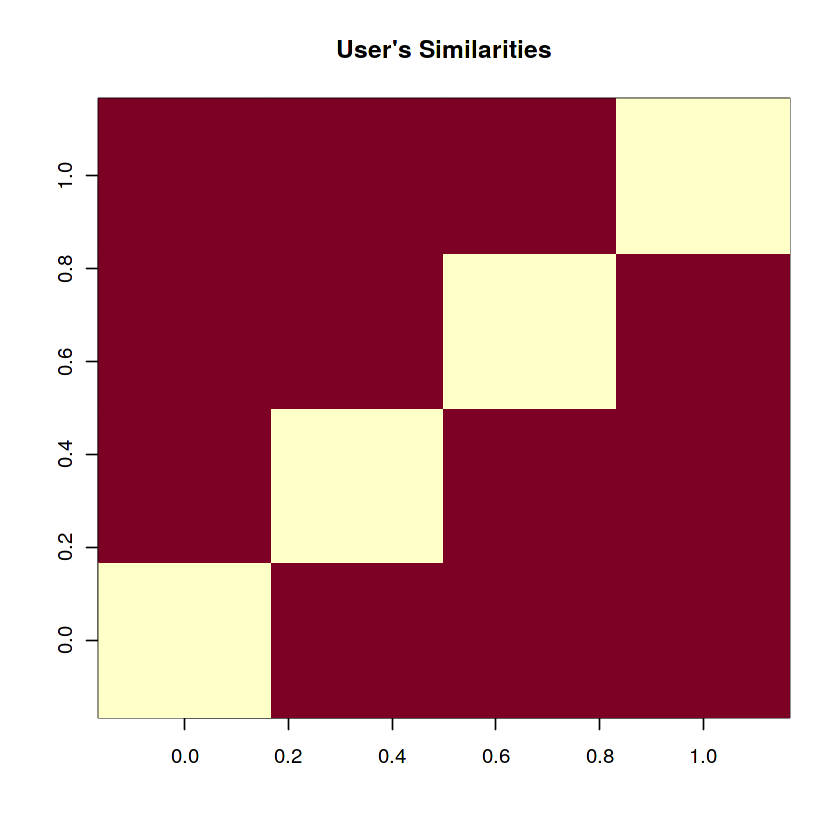

In [119]:
image(as.matrix(similarity_mat), main = "User's Similarities")

In the above matrix, each row and column represents a user. We have taken four users and each cell in this matrix represents the similarity that is shared between the two users.
Now, we delineate the similarity that is shared between the films. 

In [121]:
movie_similarity = similarity(ratingmatrix[, 1:4], method =
                                 "cosine", which = "items")
as.matrix(movie_similarity)


,1,2,3,4
1,0.0000000,0.9669732,0.9559341,0.9101276
2,0.9669732,0.0000000,0.9658757,0.9412416
3,0.9559341,0.9658757,0.0000000,0.9864877
4,0.9101276,0.9412416,0.9864877,0.0000000


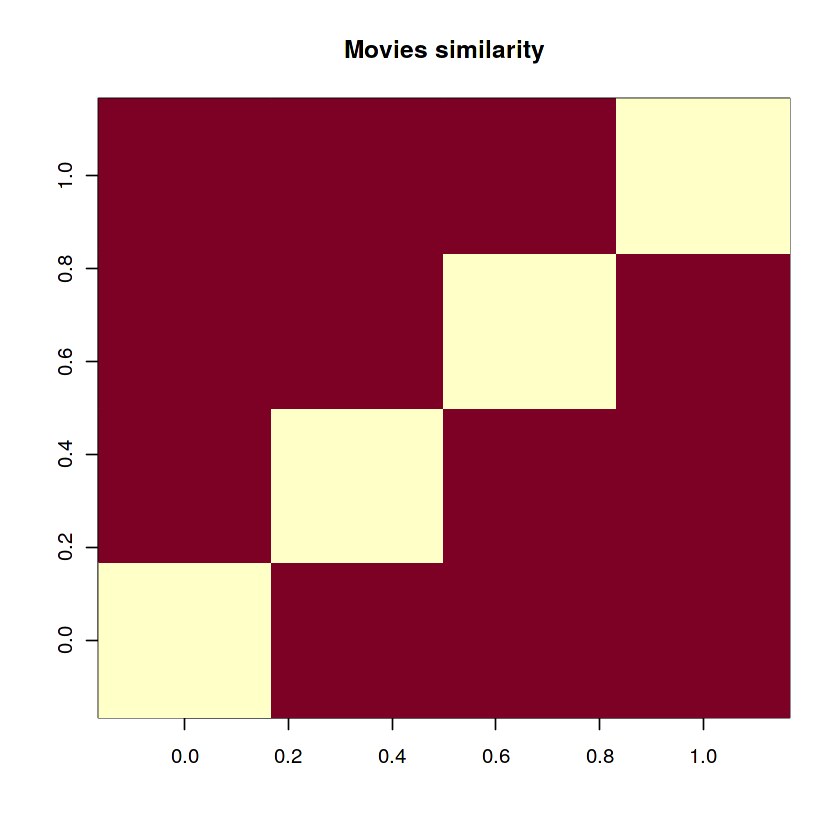

In [122]:
image(as.matrix(movie_similarity), main = "Movies similarity")

Let us now extract the most unique ratings 

In [125]:
rating_values = as.vector(ratingmatrix@data)

head(rating_values)

unique(rating_values)

[1] 0 5 0 0 4 0

[1] 0.0 5.0 4.0 3.0 4.5 1.5 2.0 3.5 1.0 2.5 0.5

Now, we will create a table of ratings that will display the most unique ratings.

In [126]:
# creating a count of movie ratings
Table_of_Ratings = table(rating_values) 
Table_of_Ratings

rating_values
      0     0.5       1     1.5       2     2.5       3     3.5       4     4.5 
6791761    1198    3258    1567    7943    5484   21729   12237   28880    8187 
      5 
  14856 

** Most Viewed Movies Visualization **

We will first count the number of views in a film and then organize them in a table that would group them in descending order.

In [128]:
# Counts views for each movies 
movie_views = colCounts(ratingmatrix)

head(movie_views)

1   2   3   4   5   6 
232  92  58  11  62 115

Next we will be creating a data frame & name column name as movie & views. 

In [129]:
table_views = data.frame(movie = names(movie_views),views = movie_views)

head(table_views)

,movie,views
,<fct>,<int>
1,1,232
2,2,92
3,3,58
4,4,11
5,5,62
6,6,115


Next we will sort in decreasing order like shown below

In [130]:
table_views=table_views[order(table_views$views,
                                 decreasing = TRUE), ]

head(table_views)

,movie,views
,<fct>,<int>
296,296,325
356,356,311
318,318,308
480,480,294
593,593,290
260,260,273


In [131]:
table_views$title = NA
for (i in 1:10325){
  table_views[i,3] = as.character(subset(movie_data,
                                         movie_data$movieId == table_views[i,1])$title)
}
table_views[1:6,]

,movie,views,title
,<fct>,<int>,<chr>
296,296,325,Pulp Fiction (1994)
356,356,311,Forrest Gump (1994)
318,318,308,"Shawshank Redemption, The (1994)"
480,480,294,Jurassic Park (1993)
593,593,290,"Silence of the Lambs, The (1991)"
260,260,273,Star Wars: Episode IV - A New Hope (1977)


Now, we will visualize a bar plot for the total number of views of the top films. We will carry this out using ggplot2.

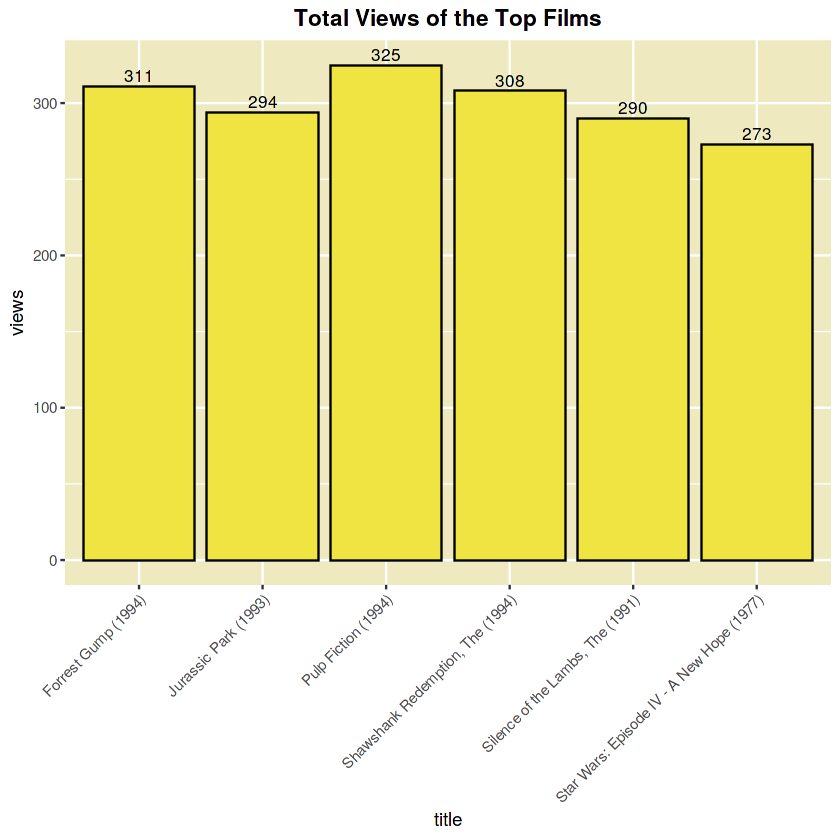

In [132]:
ggplot(table_views[1:6, ], aes(x = title, y = views)) +
  geom_bar(stat="identity", fill = '#F0E442',colour="black") +
  geom_text(aes(label=views), vjust=-0.3, size=3.5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Total Views of the Top Films")+theme(plot.title = element_text(hjust = 0.5,face="bold",colour = "black"))+theme(panel.background = element_rect(fill = "lemonchiffon2"))

From the above bar-plot, we observe that Pulp Fiction is the most-watched film followed by Forrest Gump.

** Heatmap of Movie Ratings ** 

This heatmap will contain first 25 rows and 25 columns as follows

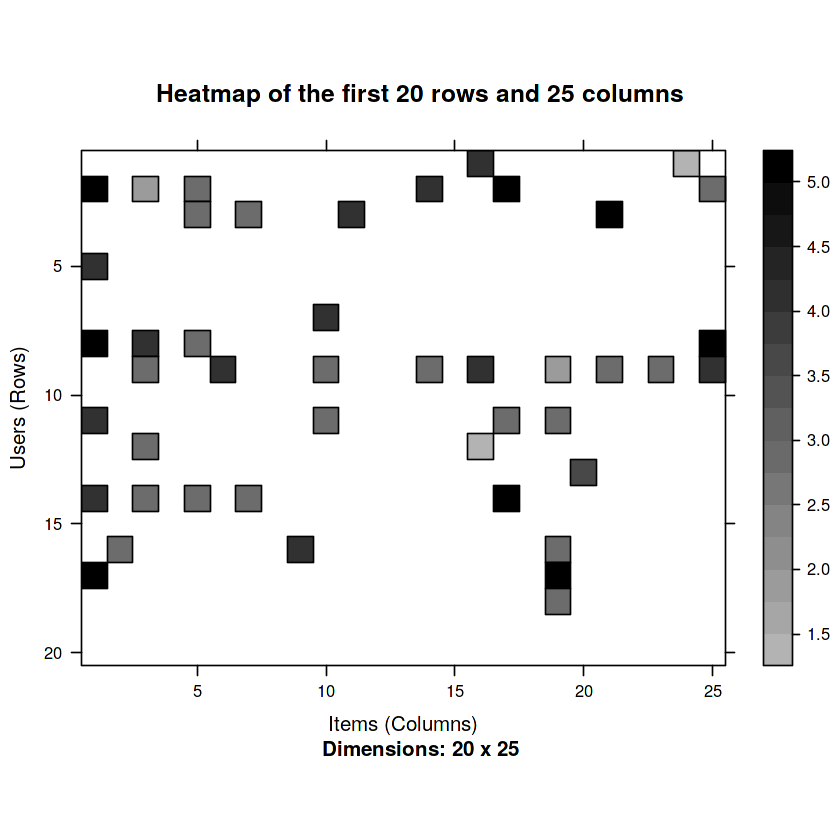

In [134]:
image(ratingmatrix[1:20, 1:25], axes = FALSE, main = "Heatmap of the first 20 rows and 25 columns")

** Performing Data Preparation ** 

We will conduct data preparation in the following three steps –

Selecting useful data.
Normalizing data.
Binarizing  data.
For finding useful data in our dataset, we have set the threshold for the minimum number of users who have rated a film as 50. This is also same for minimum number of views that are per film. This way, we have filtered a list of watched films from least-watched ones.

In [136]:
movie_ratings = ratingmatrix[rowCounts(ratingmatrix) > 50,
                             colCounts(ratingmatrix) > 50]
movie_ratings

420 x 447 rating matrix of class ‘realRatingMatrix’ with 38341 ratings.

From the above output of ‘movie_ratings’, we observe that there are 420 users and 447 films as opposed to the previous 668 users and 10325 films. We can now delineate our matrix of relevant users as follows 

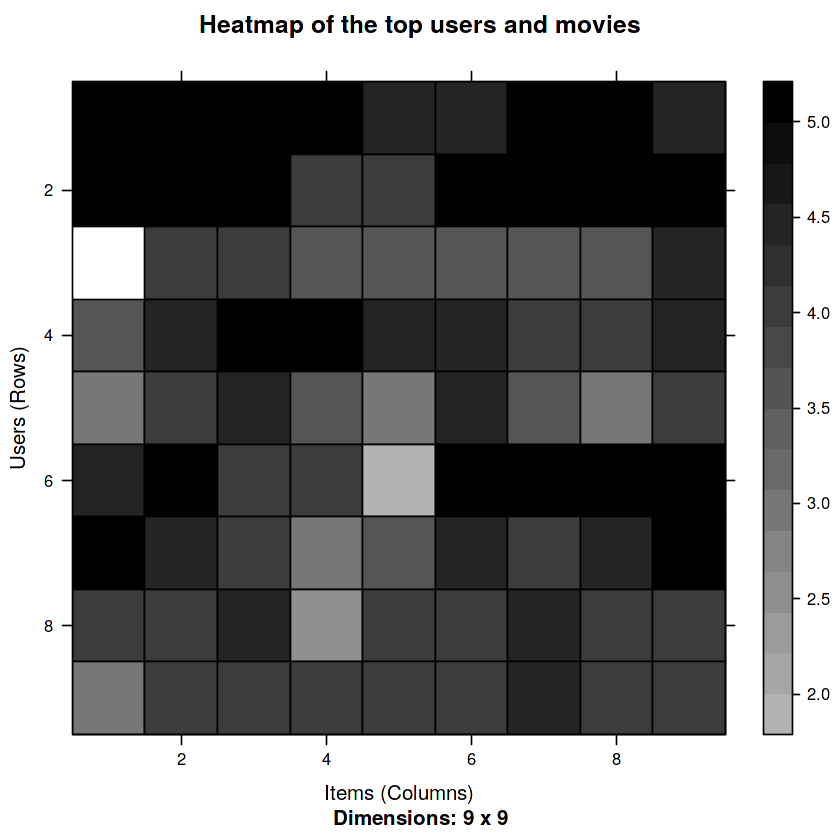

In [137]:
minimum_movies= quantile(rowCounts(movie_ratings), 0.98)
minimum_users = quantile(colCounts(movie_ratings), 0.98)
image(movie_ratings[rowCounts(movie_ratings) > minimum_movies,
                     colCounts(movie_ratings) > minimum_users],
main = "Heatmap of the top users and movies")

Now, we will visualize the distribution of the average ratings per user.

[1] 3.846591 3.680000 4.250000 2.760870 4.258065 3.728448

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



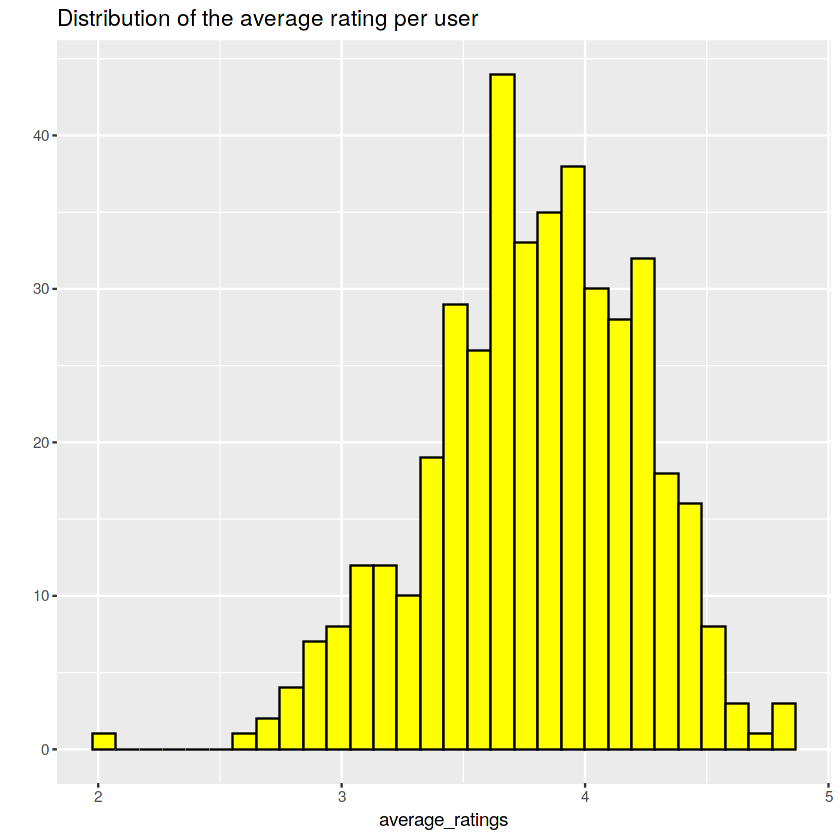

In [145]:
average_ratings = rowMeans(movie_ratings)

head(average_ratings)
qplot(average_ratings, fill=I("yellow"), col=I("black")) +
  ggtitle("Distribution of the average rating per user")

** Data Normalization **

In the case of some users, there can be high ratings or low ratings provided to all of the watched films. This will act as a bias while implementing our model. In order to remove this, we normalize our data. Normalization is a data preparation procedure to standardize the numerical values in a column to a common scale value. This is done in such a way that there is no distortion in the range of values. Normalization transforms the average value of our ratings column to 0. We then plot a heatmap that delineates our normalized ratings.

[1] 0

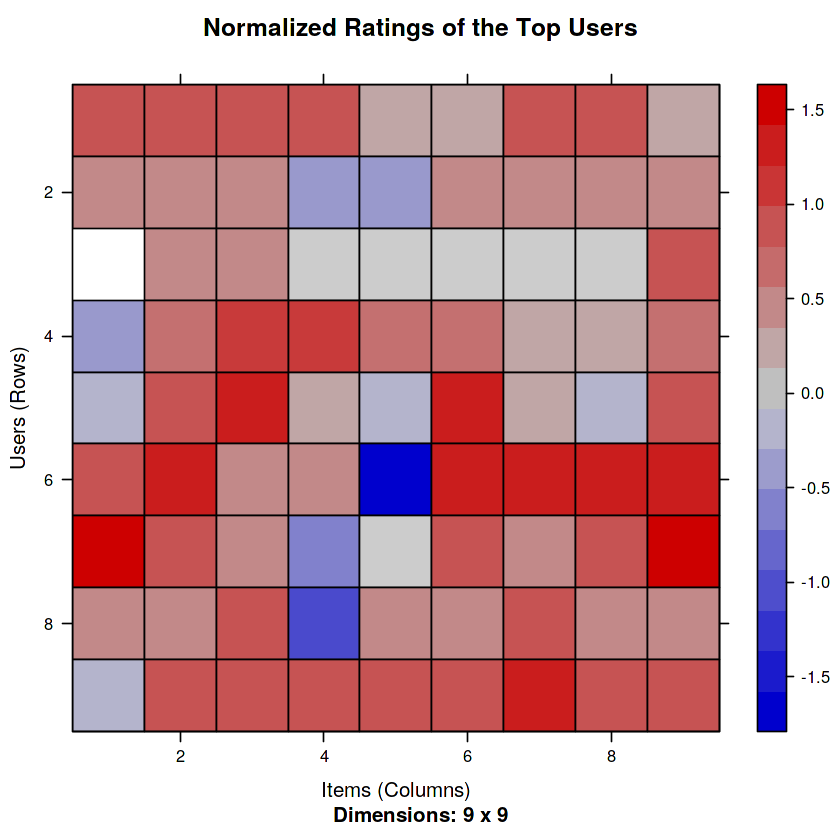

In [146]:
normalized_ratings = normalize(movie_ratings)
sum(rowMeans(normalized_ratings) > 0.00001)
image(normalized_ratings[rowCounts(normalized_ratings) > minimum_movies,
                          colCounts(normalized_ratings) > minimum_users],
main = "Normalized Ratings of the Top Users")

** Performing Data Binarization **

In the final step of our data preparation in this data science project, we will binarize our data. Binarizing the data means that we have two discrete values 1 and 0, which will allow our recommendation systems to work more efficiently. We will define a matrix that will consist of 1 if the rating is above 3 and otherwise it will be 0.

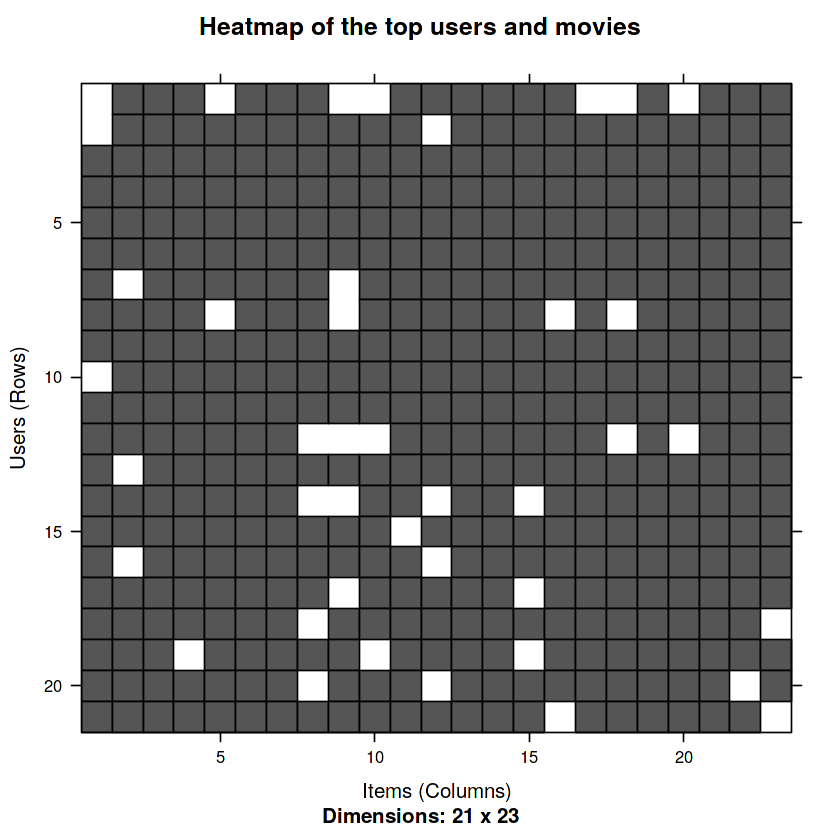

In [147]:
binary_minimum_movies = quantile(rowCounts(movie_ratings), 0.95)
binary_minimum_users = quantile(colCounts(movie_ratings), 0.95)
#movies_watched = binarize(movie_ratings, minRating = 1)
good_rated_films = binarize(movie_ratings, minRating = 3)
image(good_rated_films[rowCounts(movie_ratings) > binary_minimum_movies,
colCounts(movie_ratings) > binary_minimum_users],
main = "Heatmap of the top users and movies")

** Collaborative Filtering System ** 

In this section of data science project, we will develop our very own Item Based Collaborative Filtering System. This type of collaborative filtering finds similarity in the items based on the people’s ratings of them. The algorithm first builds a similar-items table of the customers who have purchased them into a combination of similar items. This is then fed into the recommendation system.

The similarity between single products and related products can be determined with the following algorithm –

For each Item i1 present in the product catalog, purchased by customer C.
And, for each item i2 also purchased by the customer C.
Create record that the customer purchased items i1 and i2.
Calculate the similarity between i1 and i2.
We will build this filtering system by splitting the dataset into 80% training set and 20% test set.

In [148]:
sampled_data= sample(x = c(TRUE, FALSE),
                      size = nrow(movie_ratings),
                      replace = TRUE,
                      prob = c(0.8, 0.2))
training_data = movie_ratings[sampled_data, ]
testing_data = movie_ratings[!sampled_data, ]

** Building the Recommendation System using R ** 
We will now explore the various parameters of our Item Based Collaborative Filter. These parameters are default in nature. In the first step, k denotes the number of items for computing their similarities. Here, k is equal to 30. Therefore, the algorithm will now identify the k most similar items and store their number. We use the cosine method which is the default one but you can also use pearson method.

In [149]:
recommendation_system = recommenderRegistry$get_entries(dataType ="realRatingMatrix")
recommendation_system$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

In [150]:
recommen_model = Recommender(data = training_data,
                          method = "IBCF",
                          parameter = list(k = 30))
recommen_model
class(recommen_model)

Recommender of type ‘IBCF’ for ‘realRatingMatrix’ 
learned using 345 users.

[1] "Recommender"
attr(,"package")
[1] "recommenderlab"

Let us now explore our data science recommendation system model as follows –

Using the getModel() function, we will retrieve the recommen_model. We will then find the class and dimensions of our similarity matrix that is contained within model_info. Finally, we will generate a heatmap, that will contain the top 20 items and visualize the similarity shared between them.

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

[1] 447 447

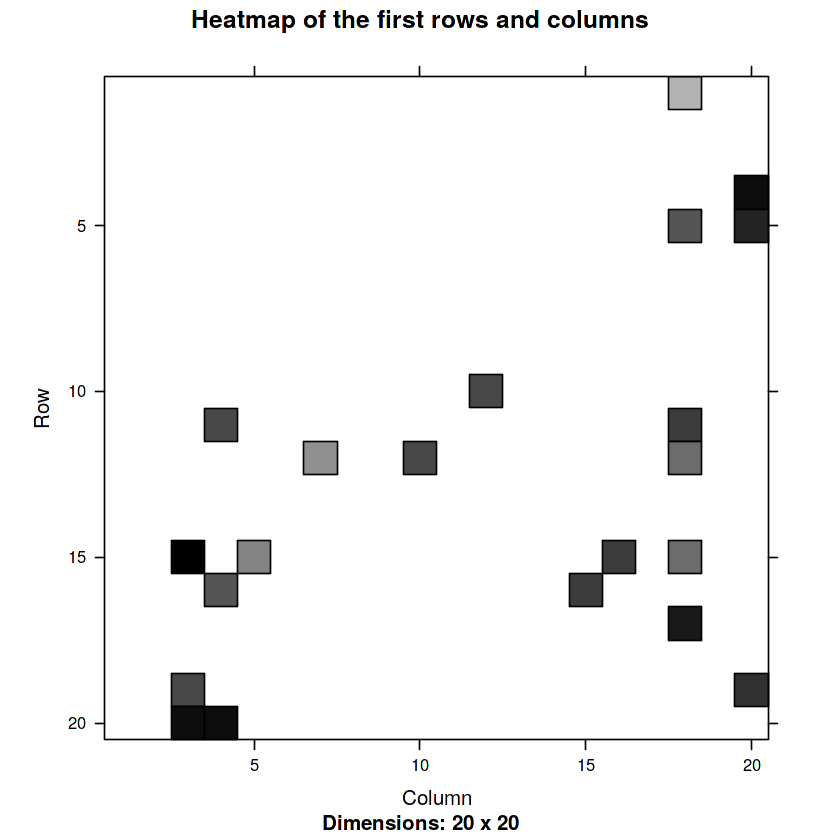

In [151]:
model_info = getModel(recommen_model)
class(model_info$sim)
dim(model_info$sim)
top_items = 20
image(model_info$sim[1:top_items, 1:top_items],
   main = "Heatmap of the first rows and columns")

In the next step of ML project, we will carry out the sum of rows and columns with the similarity of the objects above 0. We will visualize the sum of columns through a distribution as follows 

sum_rows
 30 
447 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



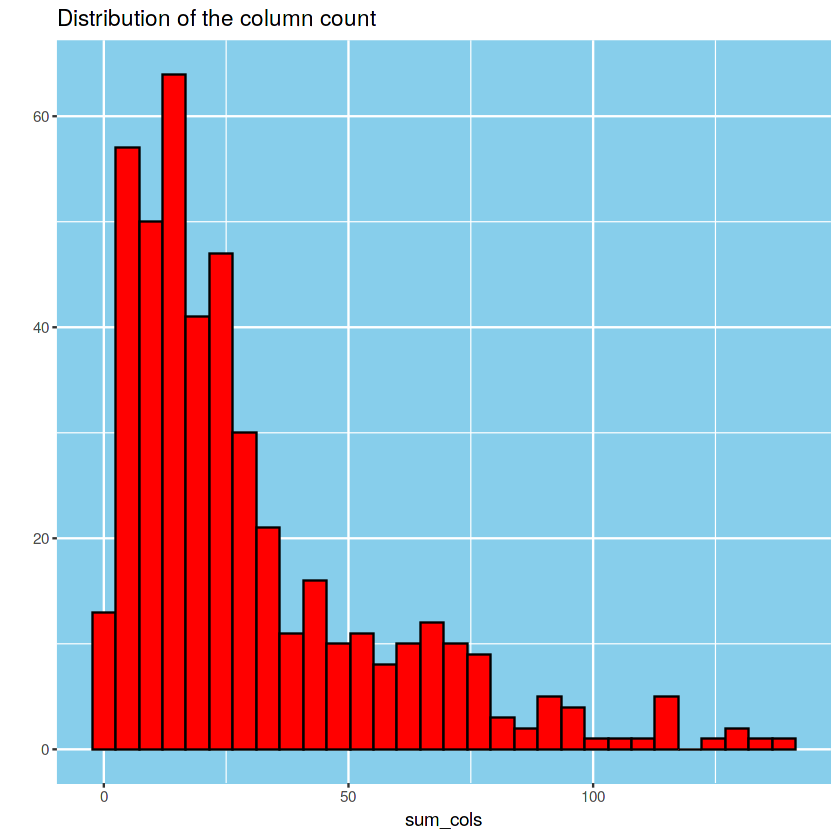

In [155]:
sum_rows = rowSums(model_info$sim > 0)
table(sum_rows)
sum_cols = colSums(model_info$sim > 0)
qplot(sum_cols, fill=I("red"), col=I("black"))+ ggtitle("Distribution of the column count")+theme(panel.background = element_rect(fill = "skyblue"))

** Building Recommender System on dataset **

We will create a top_recommendations variable which will be initialized to 10, specifying the number of films to each user. We will then use the predict() function that will identify similar items and will rank them appropriately. Here, each rating is used as a weight. Each weight is multiplied with related similarities. Finally, everything is added in the end.

In [156]:
top_recommendations = 10 # the number of items to recommend to each user
predicted_recommendations = predict(object = recommen_model,
                          newdata = testing_data,
                          n = top_recommendations)
predicted_recommendations

Recommendations as ‘topNList’ with n = 10 for 75 users. 

In [157]:
user1 = predicted_recommendations@items[[1]] # recommendation for the first user
movies_user1 = predicted_recommendations@itemLabels[user1]
movies_user2 = movies_user1
for (i in 1:10){
  movies_user2[i] = as.character(subset(movie_data,
                                         movie_data$movieId == movies_user1[i])$title)
}
movies_user2

[1] "Grumpier Old Men (1995)"      "Leaving Las Vegas (1995)"    
 [3] "Broken Arrow (1996)"          "Casper (1995)"               
 [5] "First Knight (1995)"          "Johnny Mnemonic (1995)"      
 [7] "Judge Dredd (1995)"           "Species (1995)"              
 [9] "Santa Clause, The (1994)"     "Three Musketeers, The (1993)"

In [158]:
recommendation_matrix = sapply(predicted_recommendations@items,
                      function(x){ as.integer(colnames(movie_ratings)[x]) }) 
# matrix with the recommendations for each user
#dim(recc_matrix)
recommendation_matrix[,1:4]

3,21,442,5
25,25,235,25
95,36,8368,34
158,150,1275,39
168,235,63082,48
172,266,2542,153
173,317,48780,185
196,349,1374,260
317,370,1097,355
552,432,2291,368
